In [8]:
import numpy as np
import pandas as pd

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=000&CIVILSTAND=F&Tid=2020K1%2C2008K4'

df = pd.read_csv(url, delimiter=';')

unmariaged_in_dk = np.array(df)
print(unmariaged_in_dk)

print(((unmariaged_in_dk[1][3]-unmariaged_in_dk[0][3])/ unmariaged_in_dk[0][3])*100)

[['Hele landet' 'Fraskilt' '2008K4' 432156]
 ['Hele landet' 'Fraskilt' '2020K1' 544588]]
26.016531067484888


In [9]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CTOT&Tid=2020K1&OMR%C3%85DE=101%2C147%2C155%2C185%2C165%2C151%2C153%2C157%2C159%2C161%2C163%2C167%2C169%2C183%2C173%2C175%2C187%2C201%2C240%2C210%2C250%2C270%2C260%2C217%2C219%2C223%2C230%2C400%2C411%2C253%2C259%2C350%2C265%2C269%2C320%2C376%2C316%2C326%2C360%2C370%2C306%2C329%2C330%2C340%2C336%2C390%2C420%2C430%2C440%2C482%2C410%2C480%2C450%2C461%2C479%2C492%2C530%2C561%2C563%2C607%2C510%2C621%2C540%2C550%2C573%2C575%2C630%2C580%2C710%2C766%2C615%2C707%2C727%2C730%2C741%2C740%2C746%2C706%2C751%2C657%2C661%2C756%2C665%2C760%2C779%2C671%2C791%2C810%2C813%2C860%2C849%2C825%2C846%2C773%2C840%2C787%2C820%2C851'


df = pd.read_csv(url, delimiter=';')

df = df.sort_values(by=['CIVILSTAND', 'INDHOLD'], ascending=False)
never_mariaged = np.array(df)
top_cities = never_mariaged[never_mariaged[:,0]=='I alt'][0:5]

not_mariaged = []
for n in never_mariaged[never_mariaged[:,0]=='Ugift']:
    if (n[2] in top_cities[:,2] ):
        not_mariaged.append(n)
print(np.array(not_mariaged))

percentage_of_non_mariage = {}
for index, n in enumerate(not_mariaged):
    percentage_of_non_mariage[n[2]] = (n[3]/top_cities[index][3])*100
print(percentage_of_non_mariage)

[['Ugift' '2020K1' 'København' 412512]
 ['Ugift' '2020K1' 'Aarhus' 208509]
 ['Ugift' '2020K1' 'Aalborg' 118194]
 ['Ugift' '2020K1' 'Odense' 112490]
 ['Ugift' '2020K1' 'Vejle' 54448]]
{'København': 65.23579087199924, 'Aarhus': 59.576893734838556, 'Aalborg': 54.448462512956354, 'Odense': 54.90129090509773, 'Vejle': 47.040121643570515}


{'2008K4': 602049, '2009K4': 606165, '2010K4': 609109, '2011K4': 609487, '2012K4': 609041, '2013K4': 610228, '2014K4': 607557, '2015K4': 609331, '2016K4': 611311, '2017K4': 614079, '2018K4': 617464, '2019K4': 620854, '2020K1': 620156}


<BarContainer object of 13 artists>

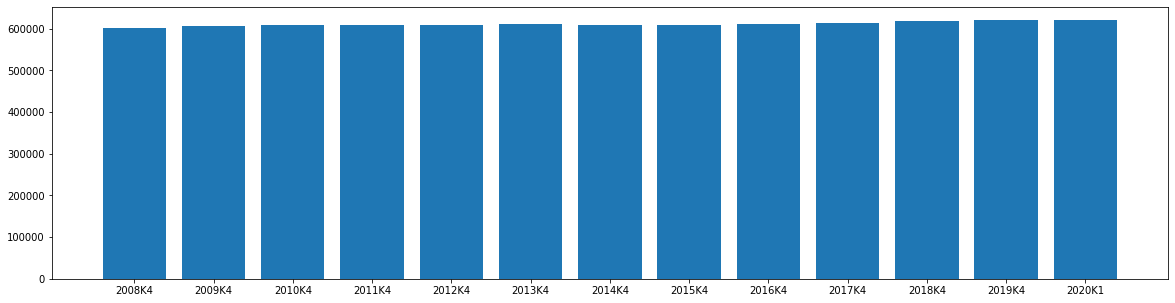

In [10]:
import matplotlib.pyplot as plt
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=084&CIVILSTAND=G&Tid=2008K4%2C2009K4%2C2010K4%2C2011K4%2C2012K4%2C2013K4%2C%2C2014K4%2C2015K4%2C2016K4%2C2017K4%2C2018K4%2C2019K4%2C2020K1'

df = pd.read_csv(url, delimiter=';')

marrital_status = np.array(df)

persons_given_year = {}
for n in marrital_status:
    persons_given_year[n[2]]= n[3]
print(persons_given_year)

y_bar = persons_given_year.values()
x_bar = persons_given_year.keys()

plt.figure(figsize=(20,5))
plt.bar(x_bar, y_bar)